# Clustering

In [2]:
library(readxl)
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)

Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'factoextra' was built under R version 4.0.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'dendextend' was built under R version 4.0.3"

---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(p

In [3]:
dfsimple <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfsimple.xlsx",sheet=1)
head(dfsimple)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3


In [4]:
df.wa.country <- dfsimple[,c('Country','ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom' )]
head(df.wa.country)
sapply(df.wa.country, class)

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,2.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,48.8
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,4.3
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,88.3
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,34.0
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,4.3


Country        ptap        bore        pspr        uspr        pwel 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       uwel        surw        tles        tmor        rain        phom 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

To apply clustering, we want to only use water accessibility variables

In [5]:
write.csv(df.wa.country , '../../results/df-water-access.csv')

In [6]:
df.explore <- dfsimple[,c('Country','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp','bicy','acar','mcyc',
                         'pcar',
                         'boat',
                         'wigc')]
head(df.explore)

Country,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp,bicy,acar,mcyc,pcar,boat,wigc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3,30.0,5.8,35.2,11.8,0.0,0.1
Albania,98.4,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9,26.4,3.2,9.6,37.0,0.7,0.1
Angola,66.9,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,99.9,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,90.6,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,97.8,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5,25.1,0.0,6.4,0.8,0.0,0.3


In [7]:
write.csv(df.explore , '../../results/df-water-explore.csv')

linkage: single or average or complete and Different Methods

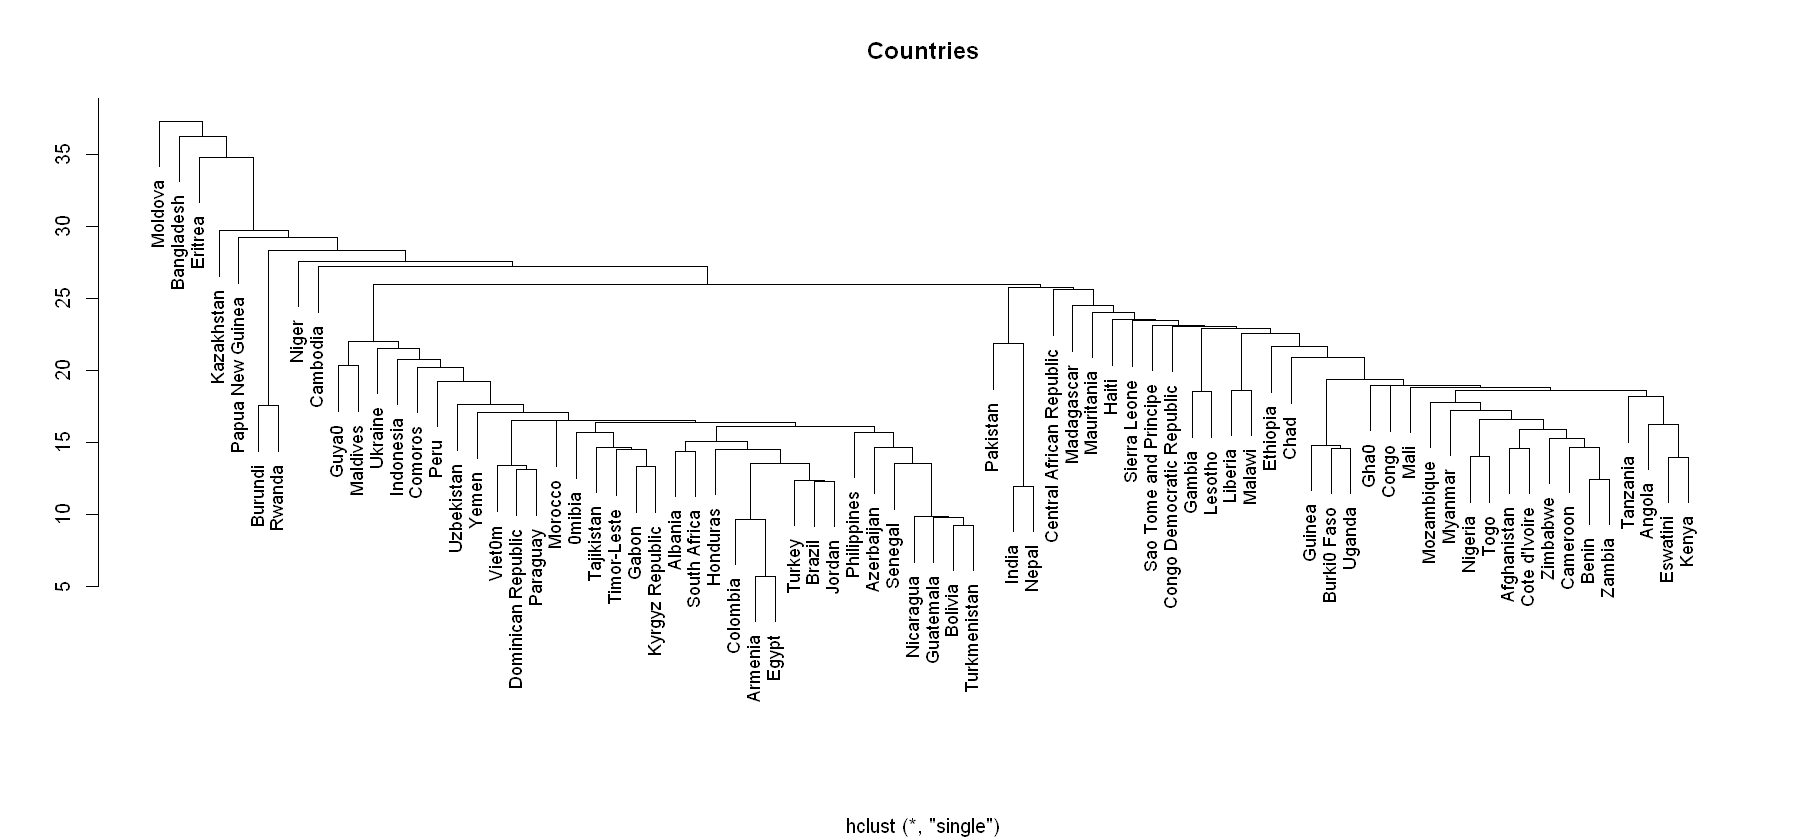

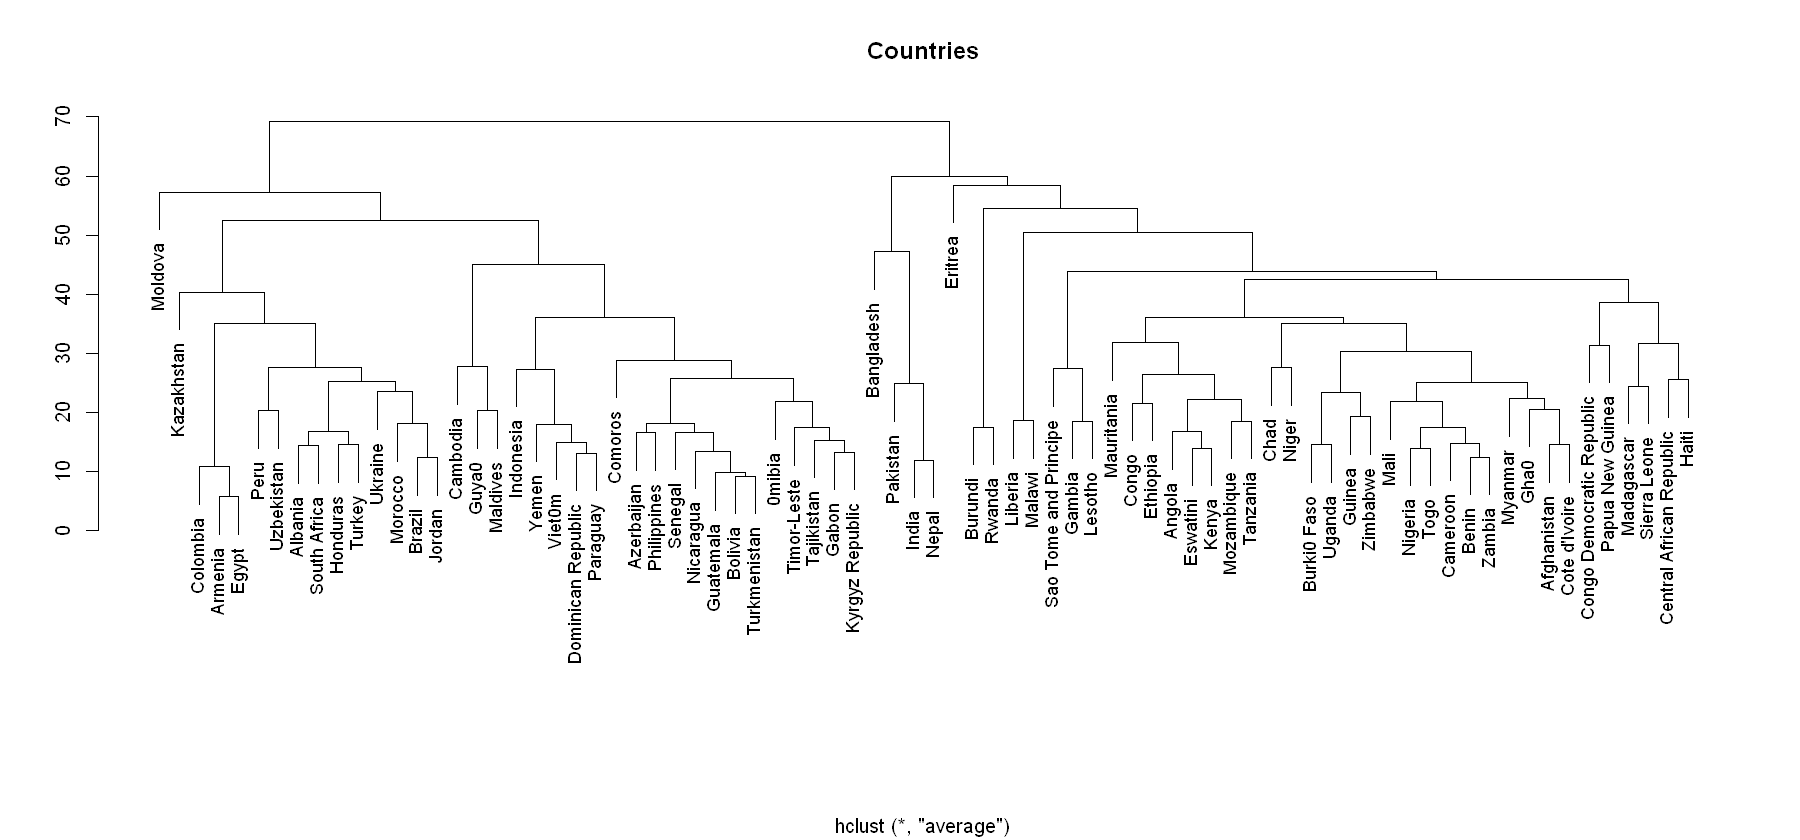

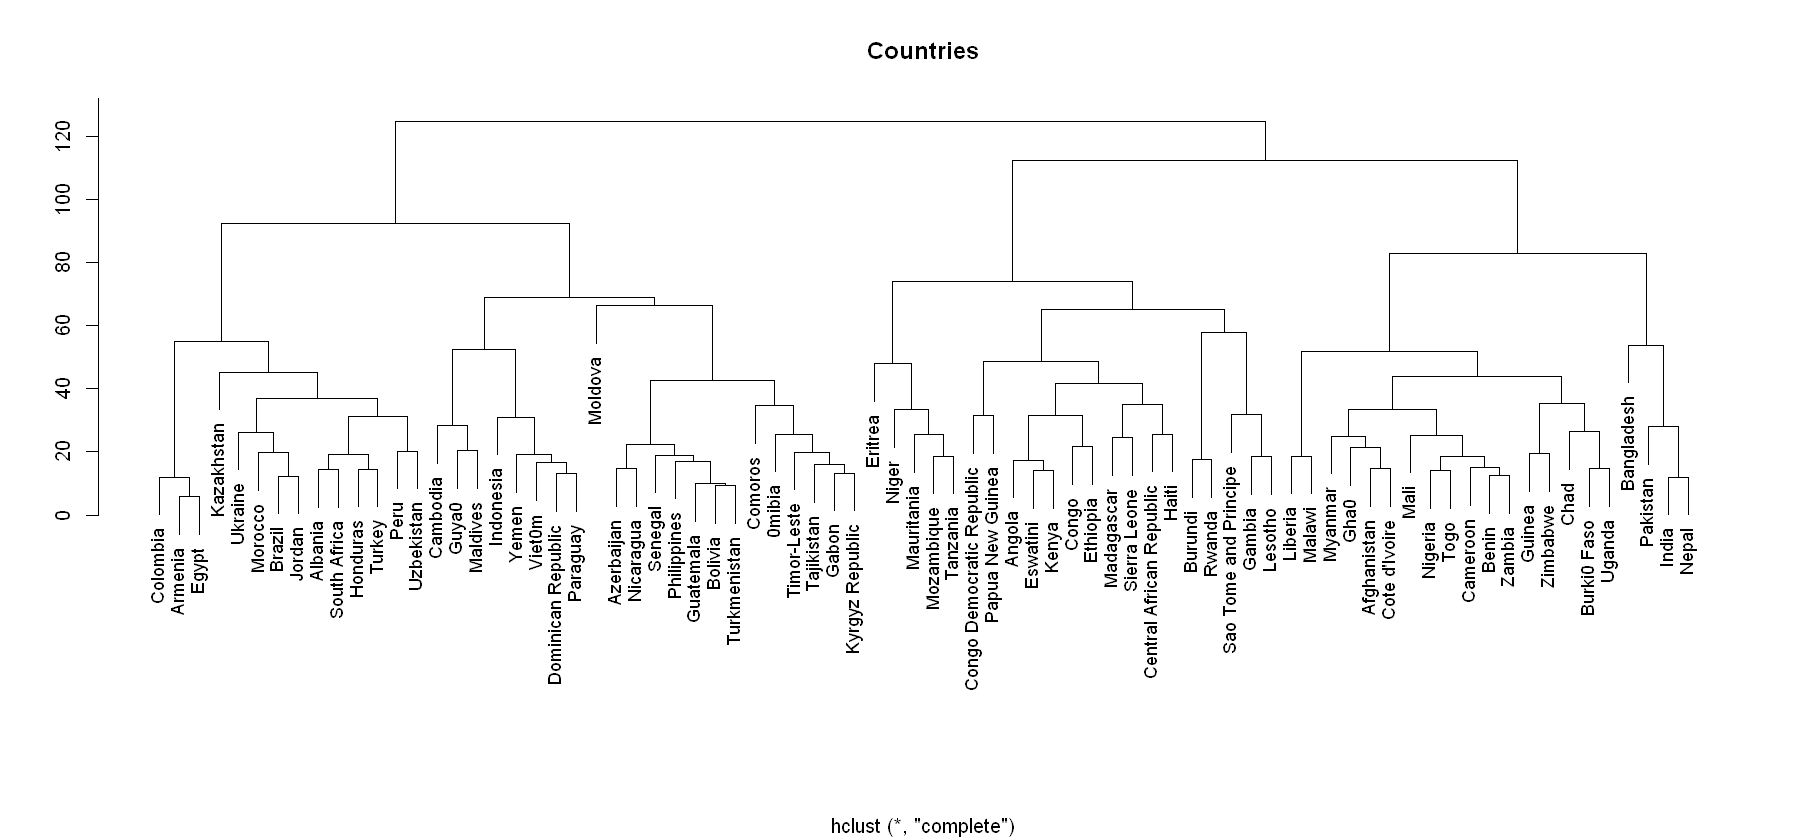

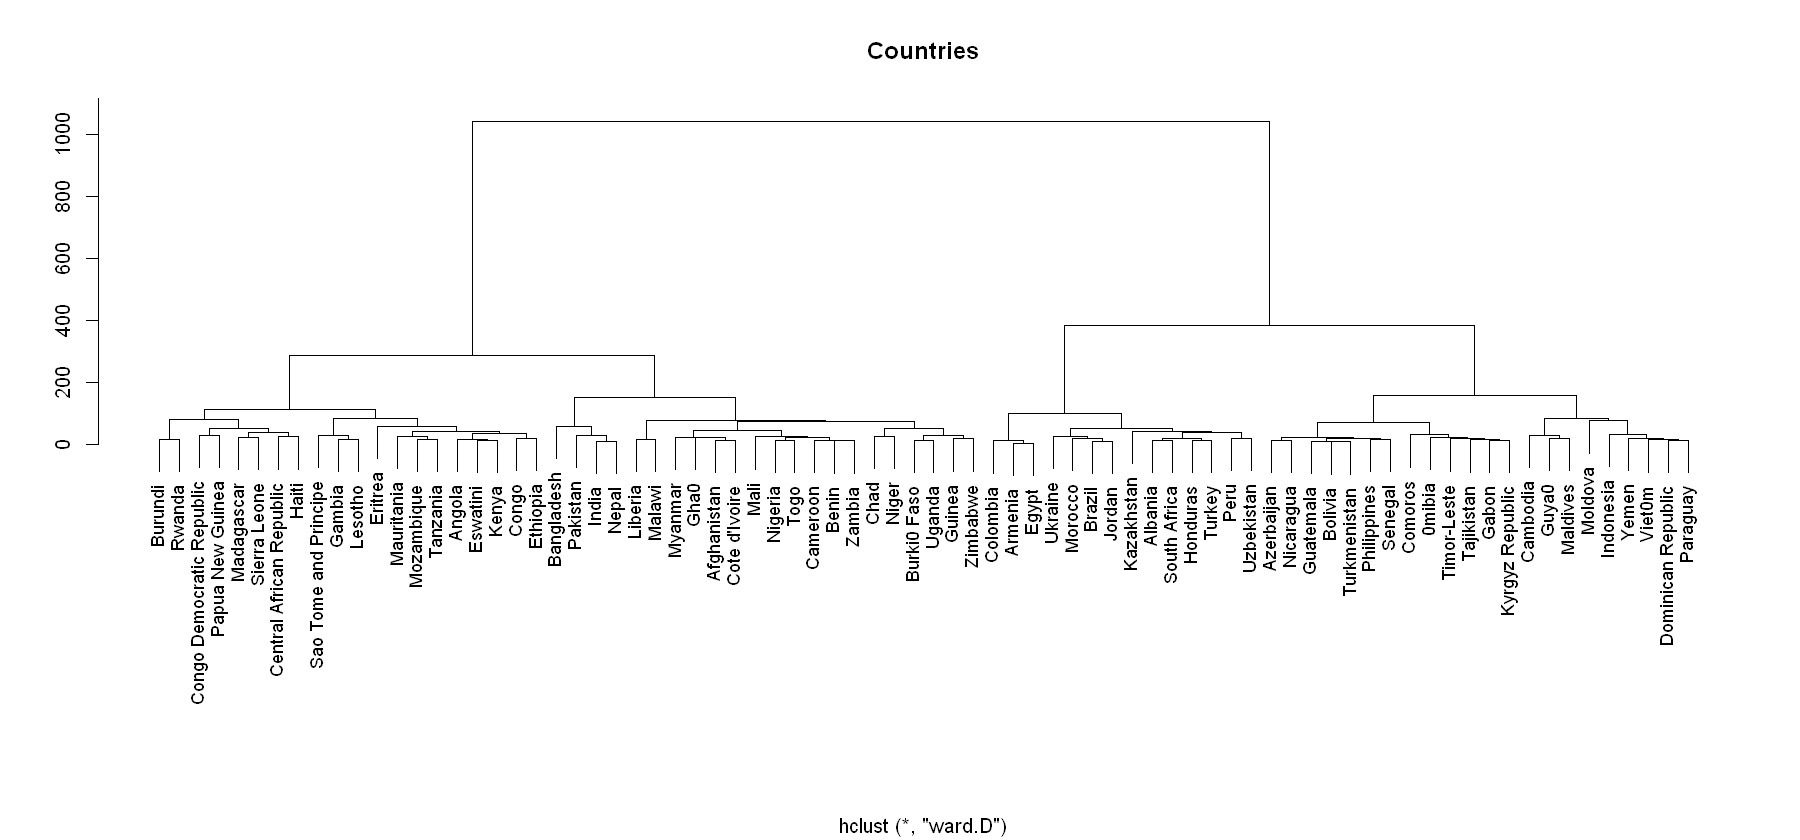

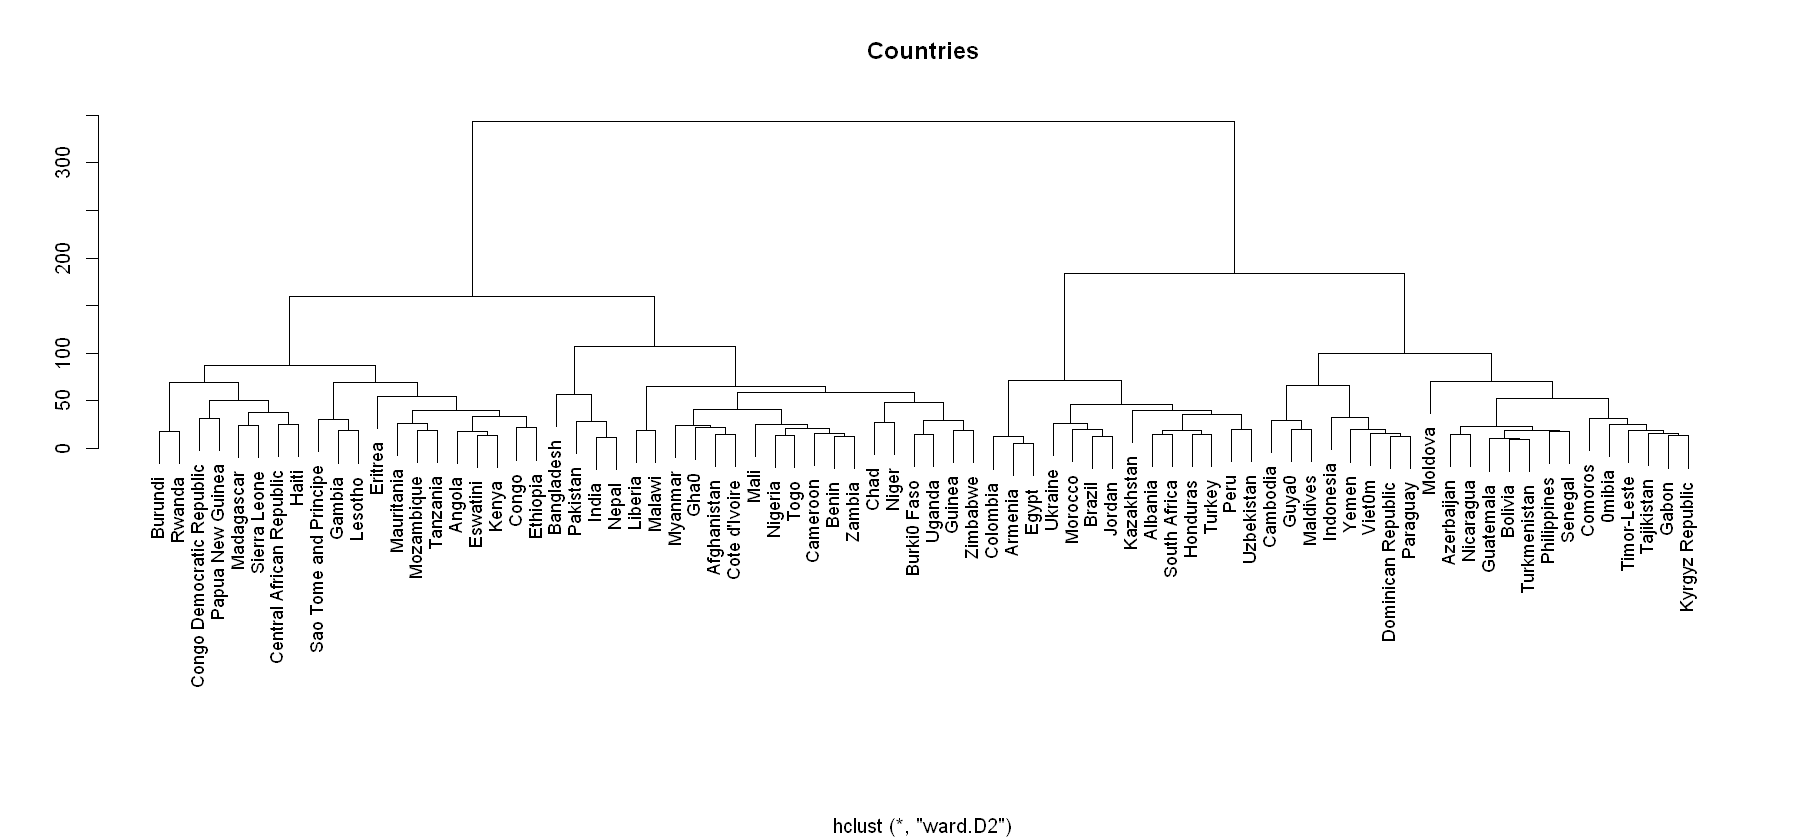

In [8]:
df.wa <- dfsimple[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom' )]

hc=hclust(dist(df.wa), method ="single")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc=hclust(dist(df.wa), method ="average")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.complete =hclust(dist(df.wa), method ="complete")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.complete, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward=hclust(dist(df.wa), method ="ward.D")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward2=hclust(dist(df.wa), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

# Determining the Best Cut for different methods

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


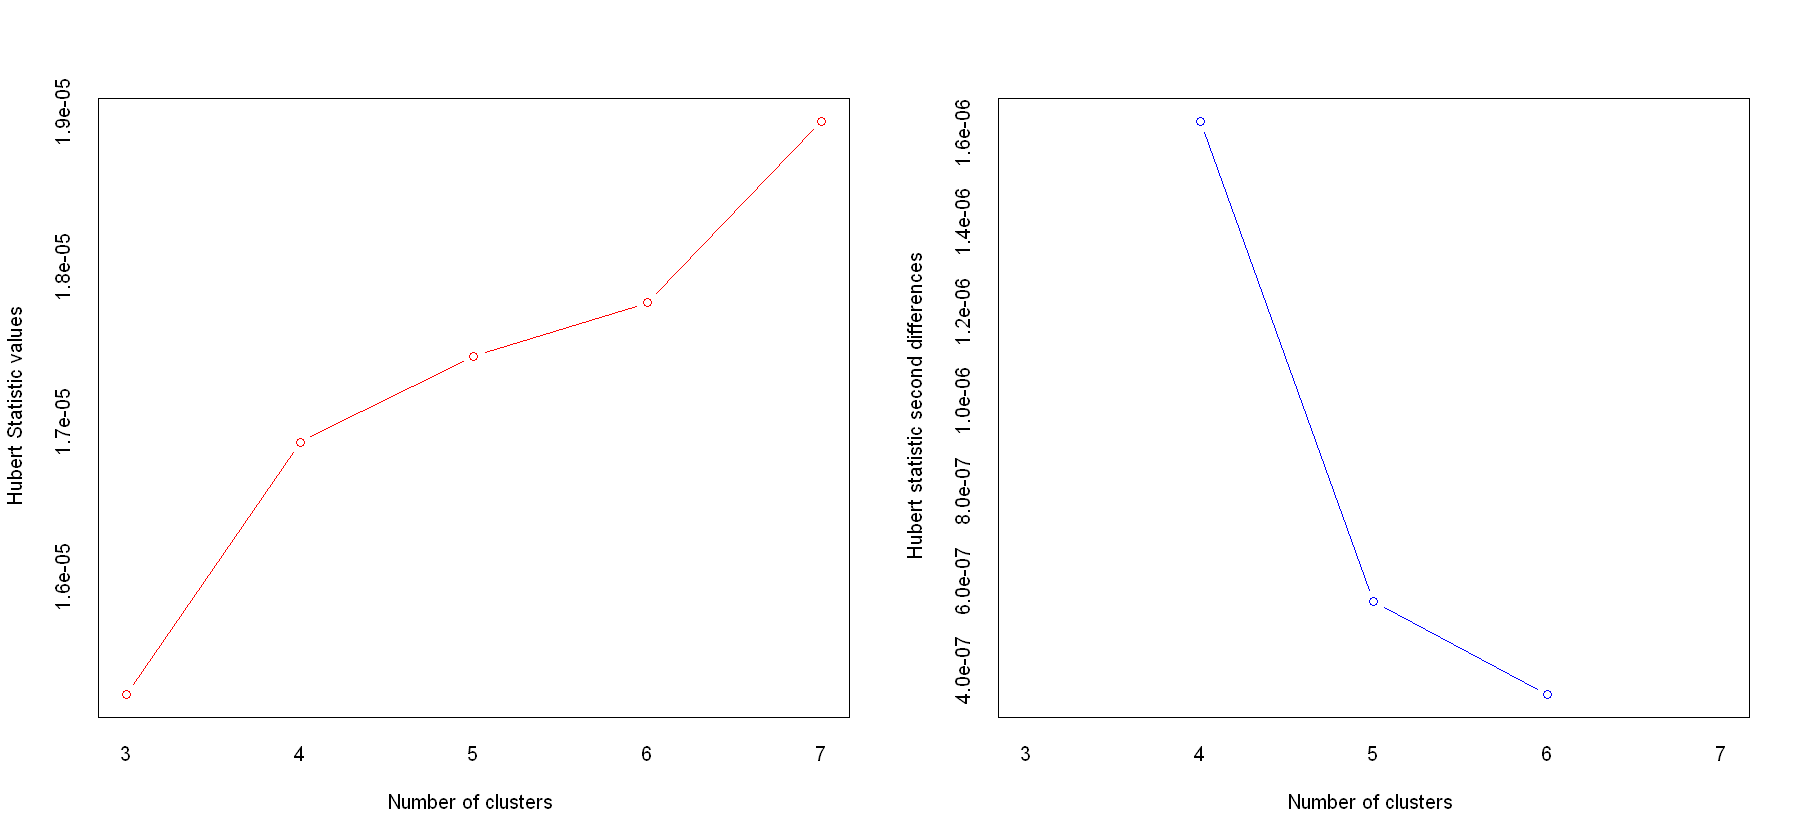

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 3 as the best number of clusters 
* 10 proposed 4 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


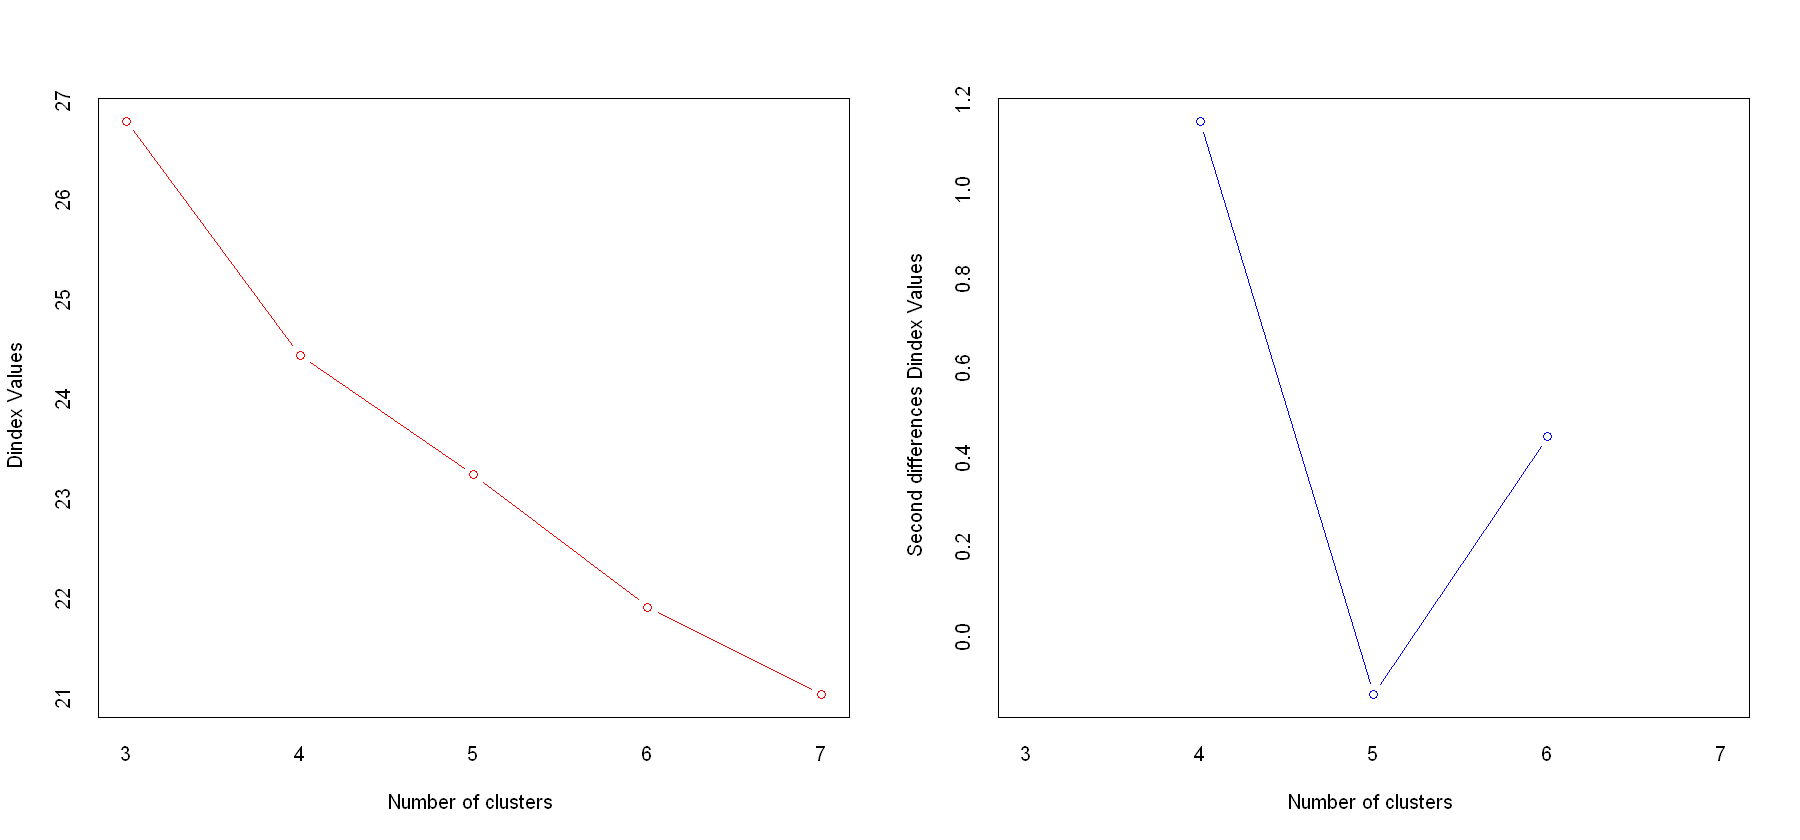

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


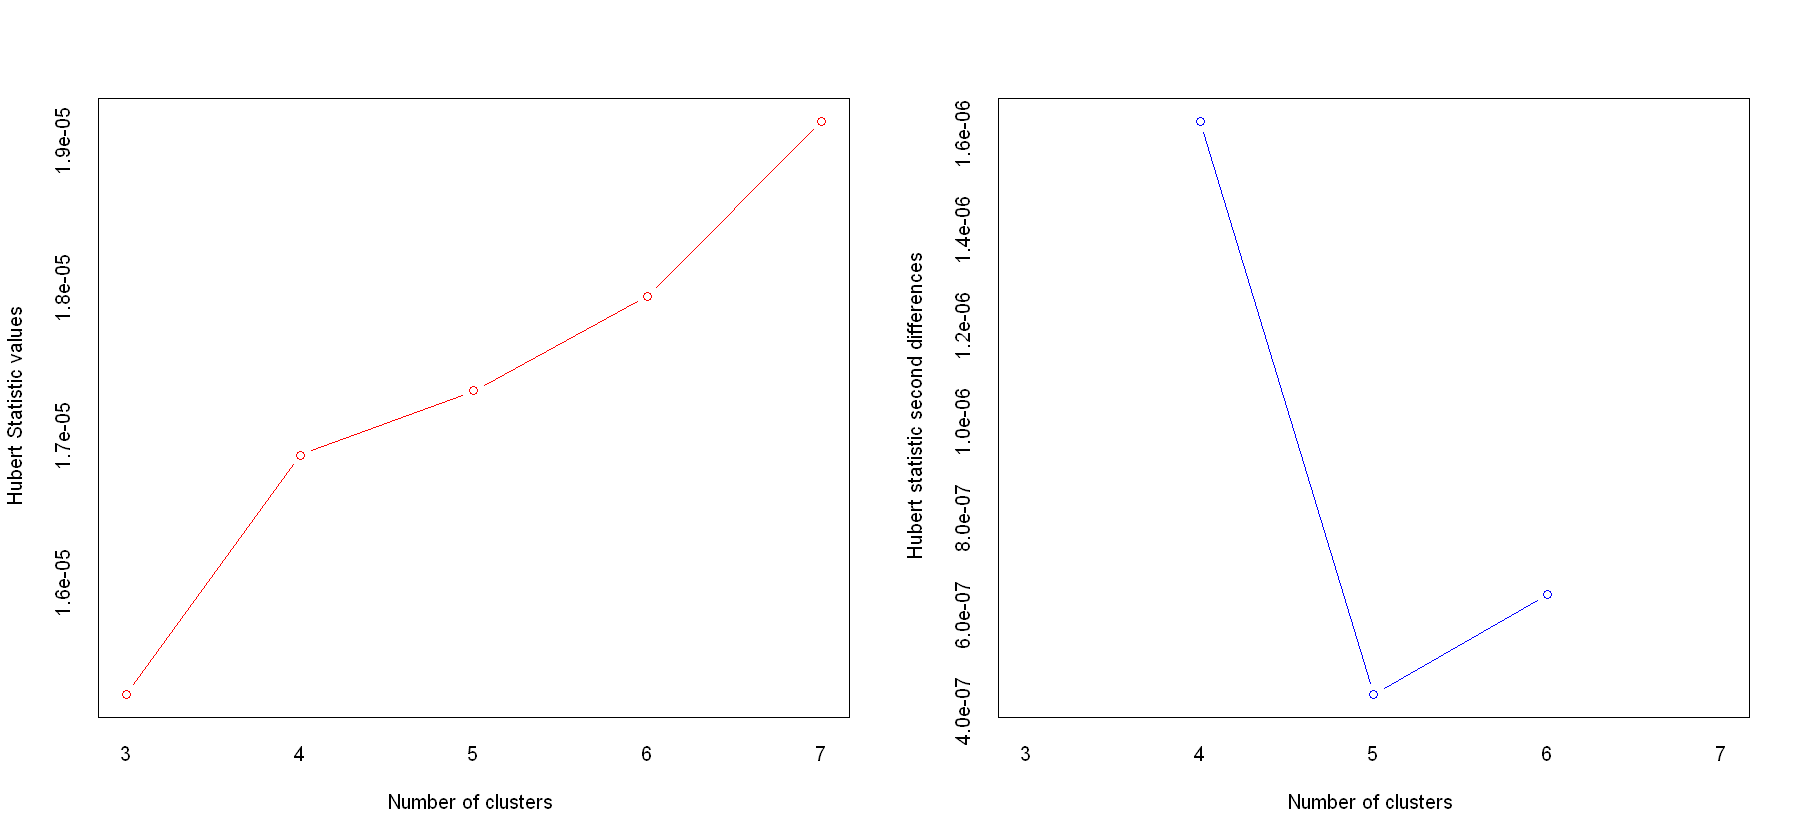

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 3 as the best number of clusters 
* 12 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


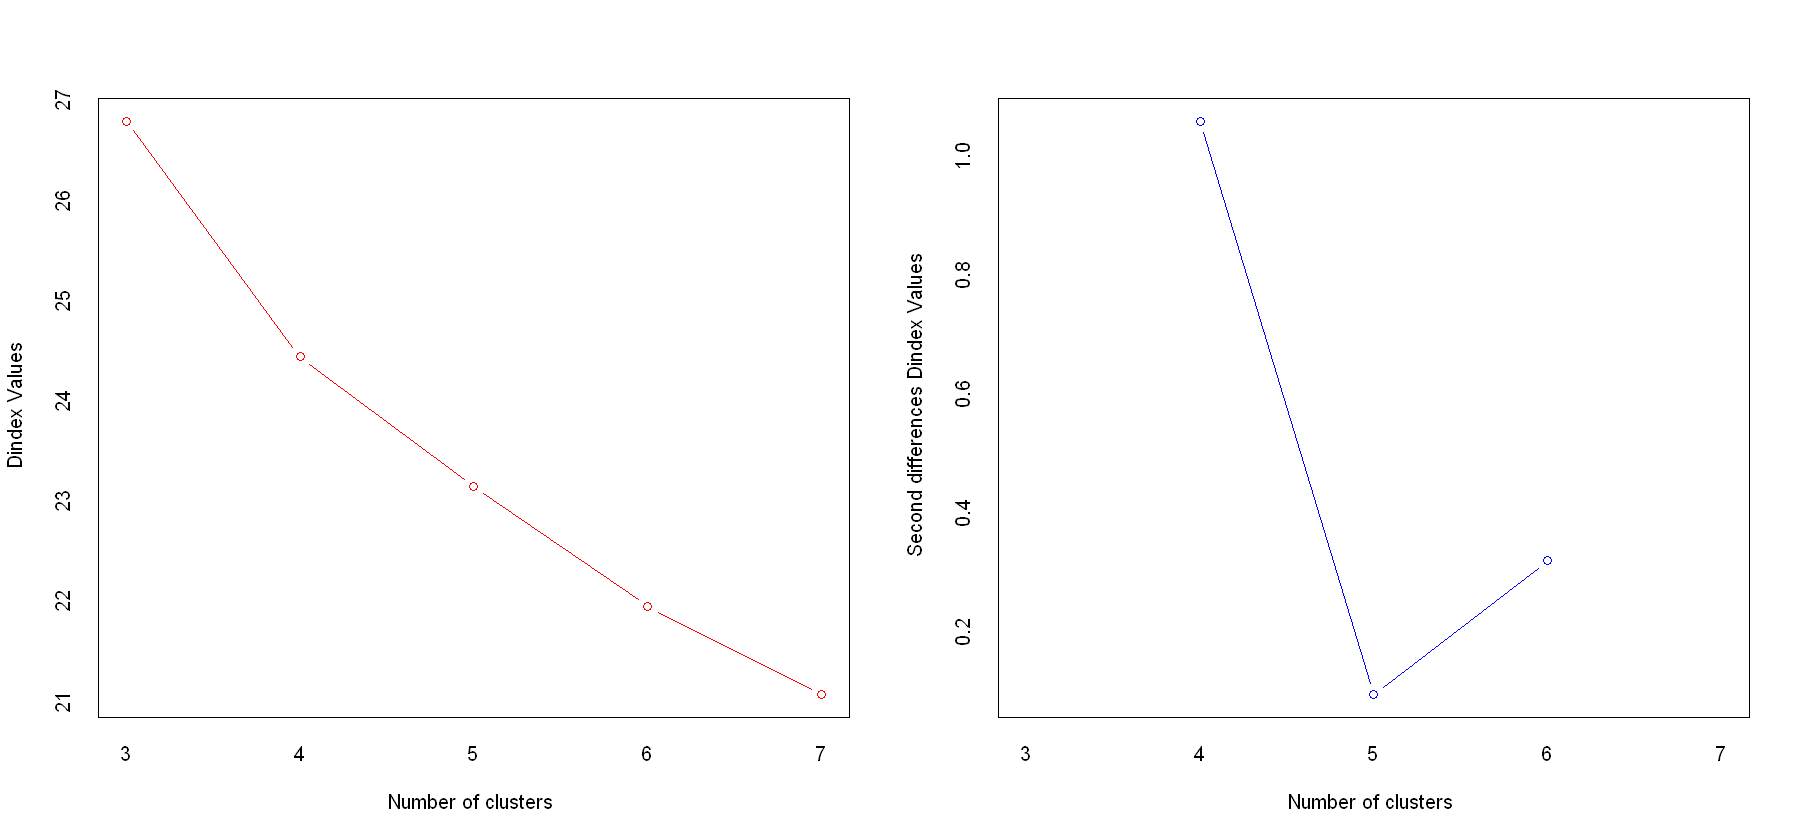

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


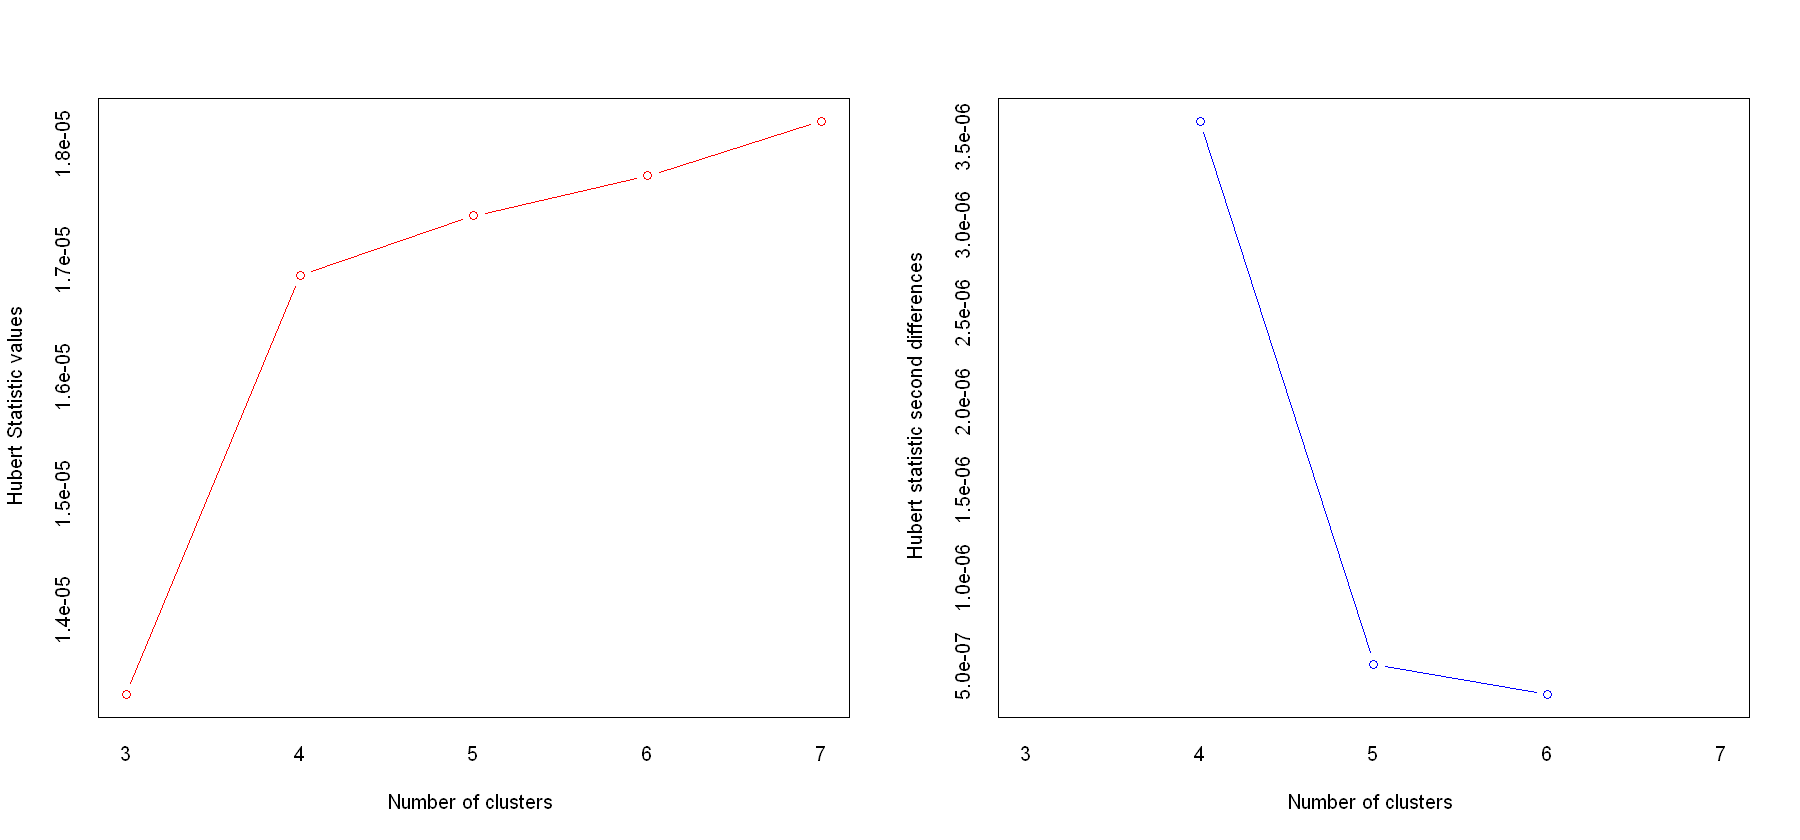

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 3 as the best number of clusters 
* 13 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


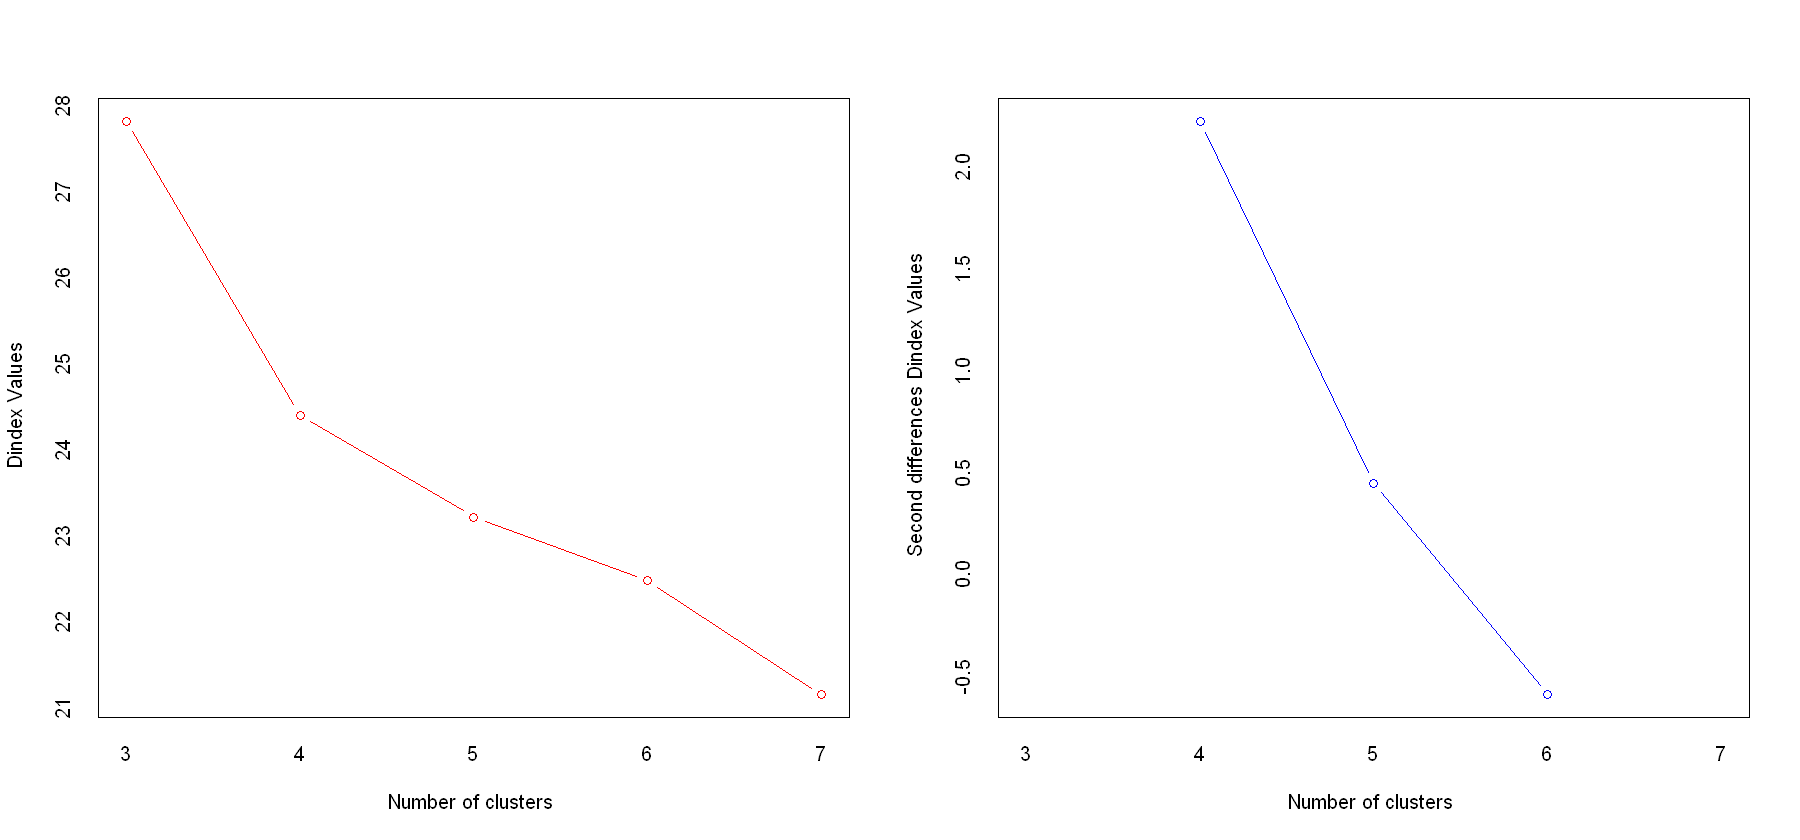

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


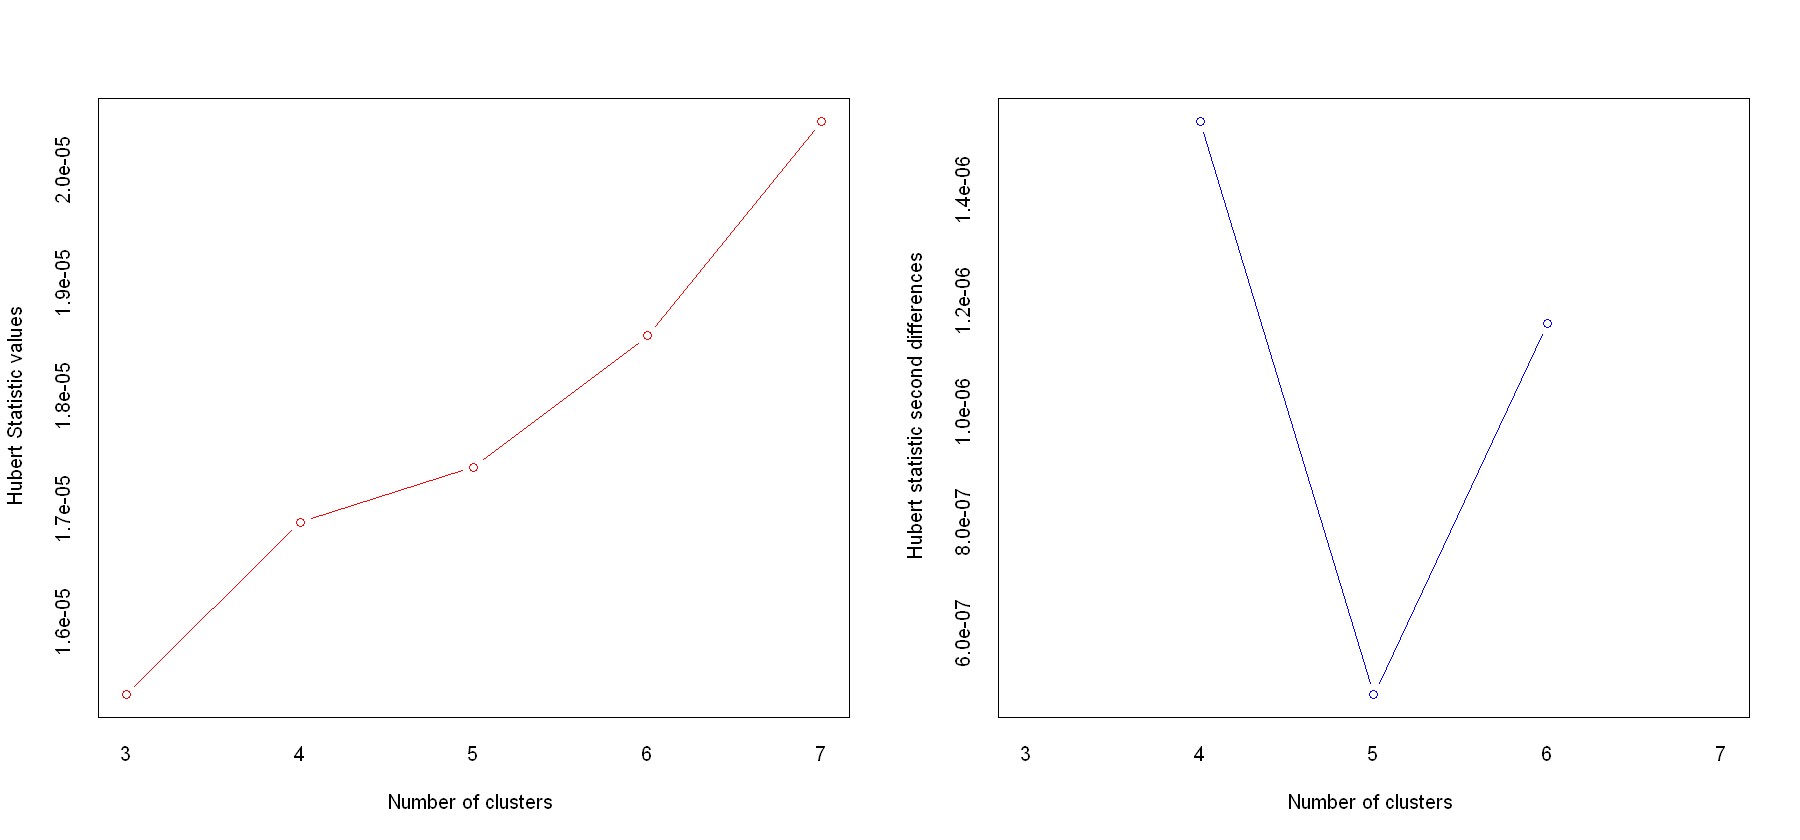

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 3 as the best number of clusters 
* 9 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


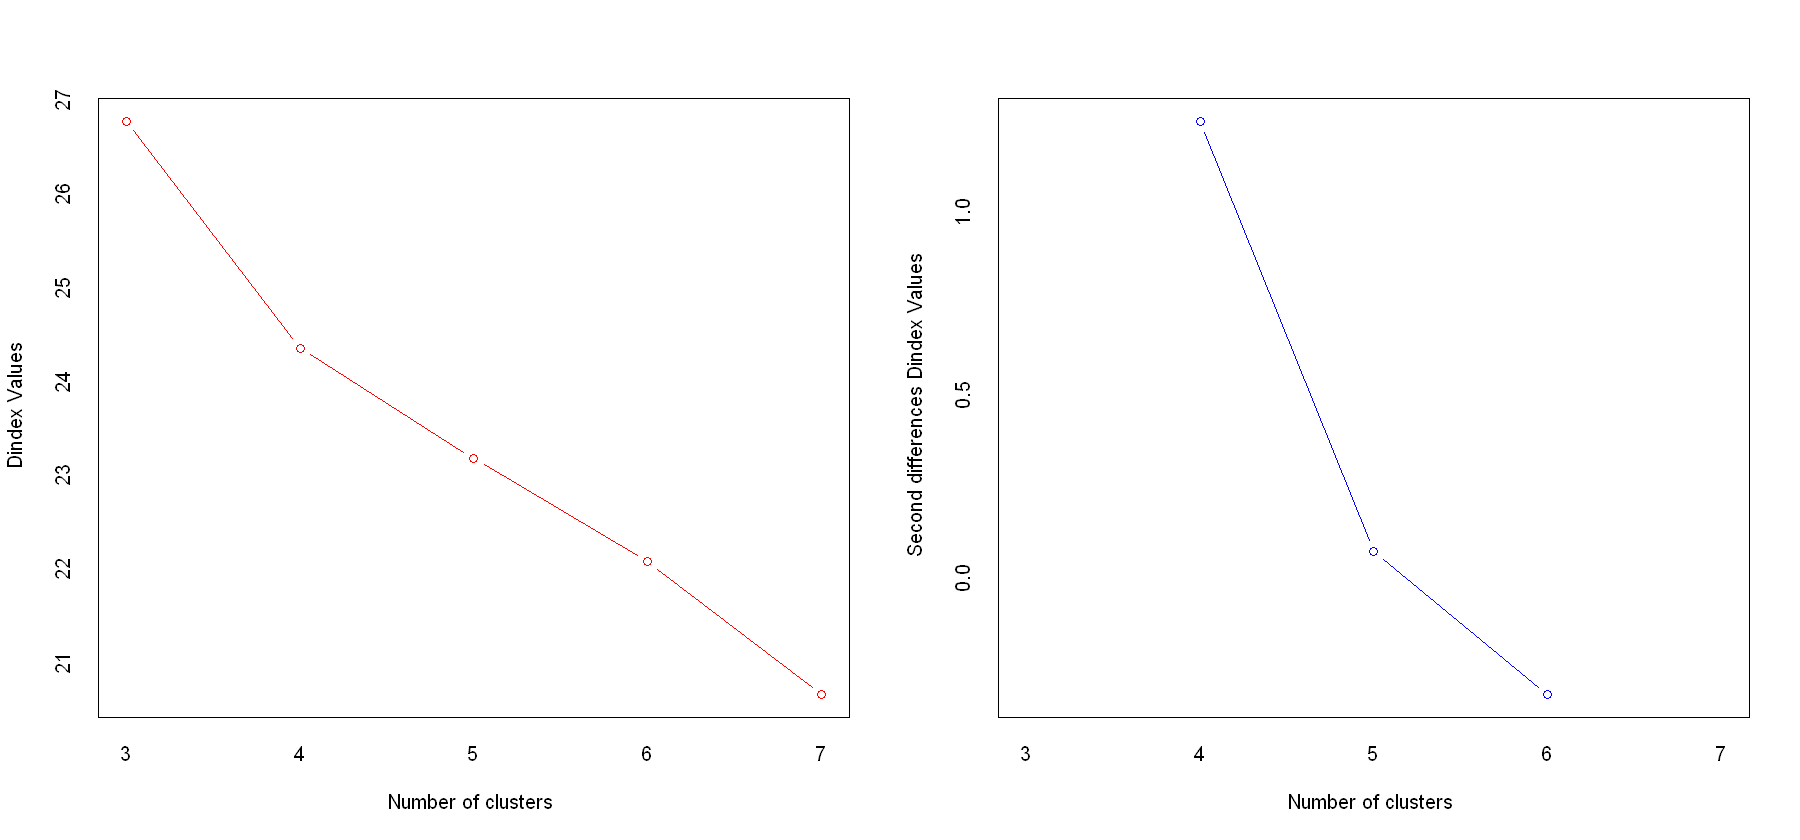

In [9]:
optimald2 = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = 'all',alphaBeale = 0.1)
optimald = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'all',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'all',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "kmeans", index = 'all',alphaBeale = 0.1)



List of the optimal index values of the NBClust function

In [10]:
list(optimald2$Best.nc)
list(optimald$Best.nc)
list(optimalcomplete$Best.nc)
list(optimal.kmeans$Best.nc)

list(optimald2$All.index)
index.d2 <- optimald2$All.index[,c(1 , 3:4 , 10,17 )]



,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,3.0000,4.0000,4.0000,4.0000,4.000000e+00,4,4.00,7.000,4.0000,...,4.0000,4.000,3.0000,2,3.0000,7.0000,0,3.0000,0,7.000
Value_Index,2.4982,42.6449,8.9831,10.1879,95.8662,1.539656e+40,35931347,7052.41,20.322,-0.3977,...,0.2981,8757.195,0.5493,NA,0.9524,0.2374,0,0.0748,0,0.337


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,3.0000,4.0000,4.0000,4.0000,4.00000e+00,4,4.000,7.0000,4.0000,...,4.0000,4.000,3.0000,2,3.0000,7.0000,0,3.000,0,7.0000
Value_Index,3.3397,42.6449,10.5255,10.1879,95.8662,1.78697e+40,35931347,7964.319,19.9228,-0.5121,...,0.2981,8757.195,0.5493,NA,0.9524,0.2341,0,0.075,0,0.3372


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,4.0000,4.0000,4.0000,4.0000,4.000000e+00,4,4.00,5.0000,4.000,...,3.0000,4.00,4.0000,2,3.0000,7.0000,0,4.0000,0,7.0000
Value_Index,3.9093,41.2028,15.3369,10.3487,98.4243,1.772716e+40,52452802,11429.38,11.2087,-0.707,...,0.3193,10044.67,0.5258,NA,1.1688,0.2436,0,0.0744,0,0.3266


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,4.0000,3.0000,4.0000,4.0000,4.000,4.000000e+00,4,4.000,5.0000,4.000,...,3.0000,4.000,3.0000,2,3.0000,7.0000,0,3.0000,0,7.0000
Value_Index,3.0736,42.9217,10.8256,10.4483,95.337,1.535403e+40,36644755,8150.782,11.1565,-0.513,...,0.2948,8880.854,0.5549,NA,0.9698,0.2194,0,0.0759,0,0.3213


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,Ptbiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
3,1.0954,42.6449,17.8481,9.0529,455.2341,5.711600e+40,72907780,66650.06,39.2911,4.4350,...,0.2932,22216.687,0.5493,0.6112,0.9524,0.1438,0,0.0748,26.7965,0.4134
4,2.4982,40.5963,8.8651,10.1879,551.1003,2.970734e+40,36976433,53837.97,45.3188,5.4904,...,0.2981,13459.493,0.5241,0.2645,1.7263,0.1707,0,0.0791,24.4445,0.3660
5,1.0227,35.8203,8.4557,8.8985,626.3224,1.769524e+40,28296319,48078.29,56.3242,6.1481,...,0.2802,9615.658,0.5268,0.6674,1.9006,0.2185,0,0.0824,23.2460,0.3576
6,1.2929,33.2055,6.8944,8.8379,696.1687,1.040695e+40,22522539,43087.41,64.0359,6.8602,...,0.2700,7181.235,0.5006,0.2883,2.3256,0.2185,0,0.0808,21.9190,0.3421
7,1.5614,31.0330,4.9287,9.0608,780.7946,4.786635e+39,18974533,39322.08,84.3580,7.5172,...,0.2645,5617.441,0.4910,0.6677,2.7416,0.2374,0,0.0898,21.0405,0.3370


Dev of bar plot determing the best clustering result is 4 cuts.

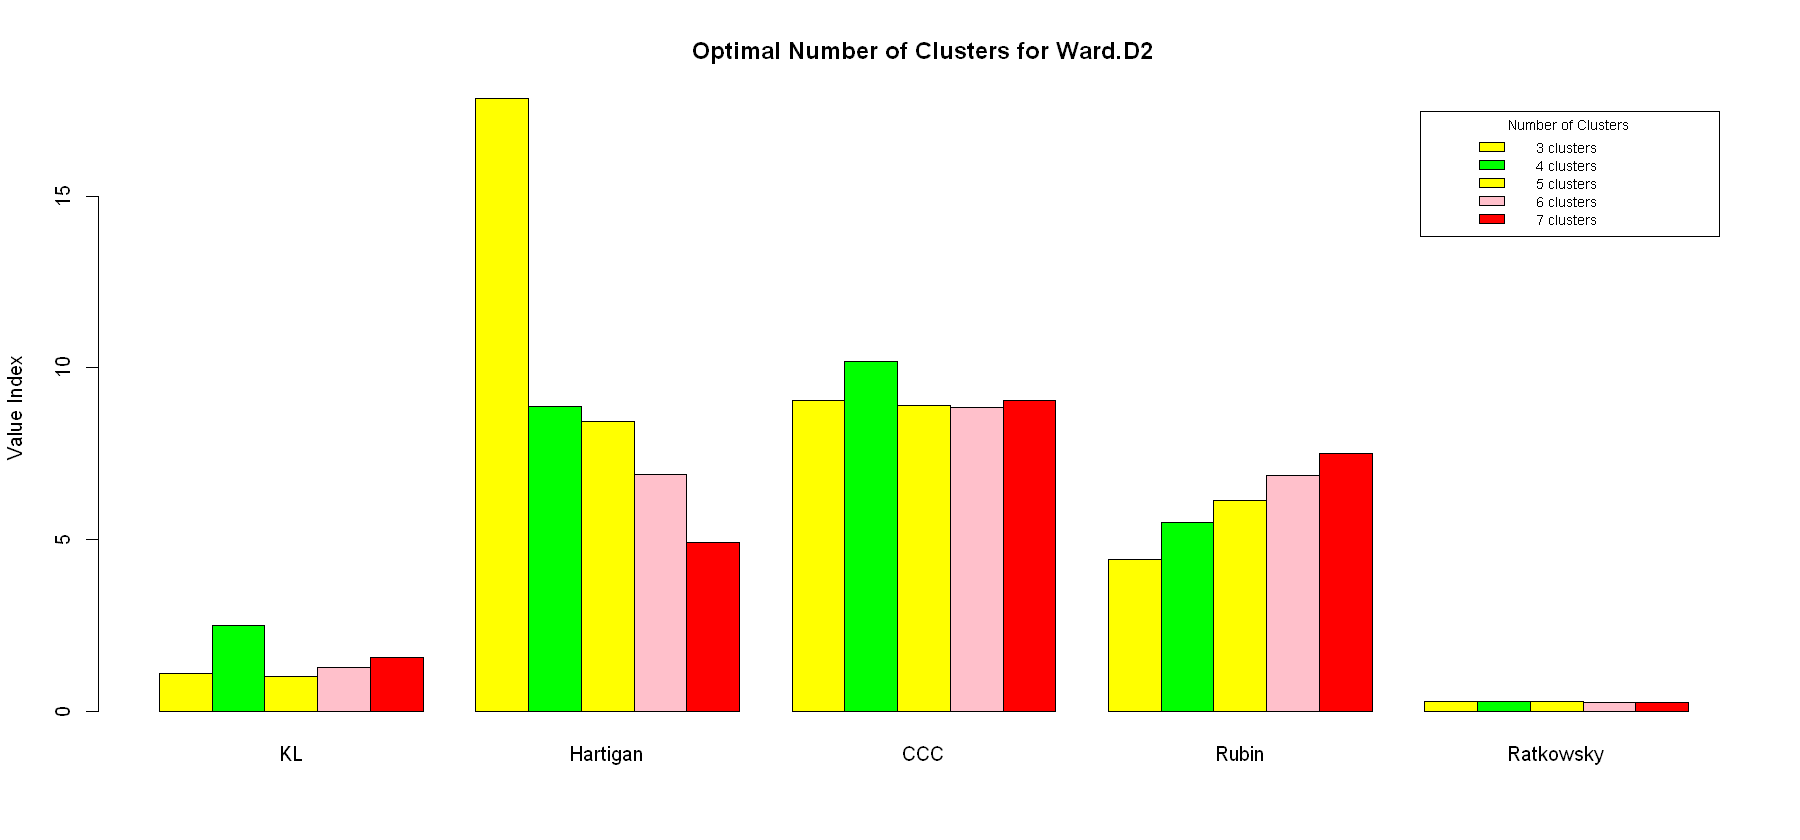

In [11]:
barplot(index.d2, beside = TRUE, main = "Optimal Number of Clusters for Ward.D2",
        col = c("yellow", "green", "yellow","pink","red"),
        ylab = "Value Index", legend = c("3 clusters", "4 clusters", "5 clusters","6 clusters","7 clusters"), 
        args.legend = list(title = "Number of Clusters", cex = .7))

Cutting at different tree levels 4 which is the optimal for Ward.D2

In [12]:
clusters_wa <- cutree(hc.ward2,4)     
dfsimple$clusters <- cutree(hc.ward2,4)
head(dfsimple)
write.csv(dfsimple , '../../results/dfsimple.csv')

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,4
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,1


# Fancy Clustering Graph Majority 

cluster,n
<int>,<int>
1,22
2,14
3,20
4,22


[[1]]
 [1] "Afghanistan"   "Bangladesh"    "Benin"         "Burki0 Faso"  
 [5] "Cameroon"      "Chad"          "Cote d'Ivoire" "Gha0"         
 [9] "Guinea"        "India"         "Liberia"       "Malawi"       
[13] "Mali"          "Myanmar"       "Nepal"         "Niger"        
[17] "Nigeria"       "Pakistan"      "Togo"          "Uganda"       
[21] "Zambia"        "Zimbabwe"     

[[2]]
 [1] "Albania"      "Armenia"      "Brazil"       "Colombia"     "Egypt"       
 [6] "Honduras"     "Jordan"       "Kazakhstan"   "Morocco"      "Peru"        
[11] "South Africa" "Turkey"       "Ukraine"      "Uzbekistan"  

[[3]]
 [1] "Angola"                    "Burundi"                  
 [3] "Central African Republic"  "Congo"                    
 [5] "Congo Democratic Republic" "Eritrea"                  
 [7] "Eswatini"                  "Ethiopia"                 
 [9] "Gambia"                    "Haiti"                    
[11] "Kenya"                     "Lesotho"                  
[13] "Madagascar"                "Mauritania"               
[15] "Mozambique"                "Papua New Guinea"         
[17] "Rwanda"                    "Sao Tome and Principe"    
[19] "Sierra Leone"              "Tanzania"                 

[[4]]
 [1] "Azerbaijan"         "Bolivia"            "Cambodia"          
 [4] "Comoros"            "Dominican Republic" "Gabon"             
 [7] "Guatemala"          "Guya0"              "Indonesia"         
[10] "Kyrgyz Republic"    "Maldives"           "Moldova"           
[13] "0mibia"             "Nicaragua"          "Paraguay"          
[16] "Philippines"        "Senegal"            "Tajikistan"        
[19] "Timor-Leste"        "Turkmenistan"       "Viet0m"            
[22] "Yemen"

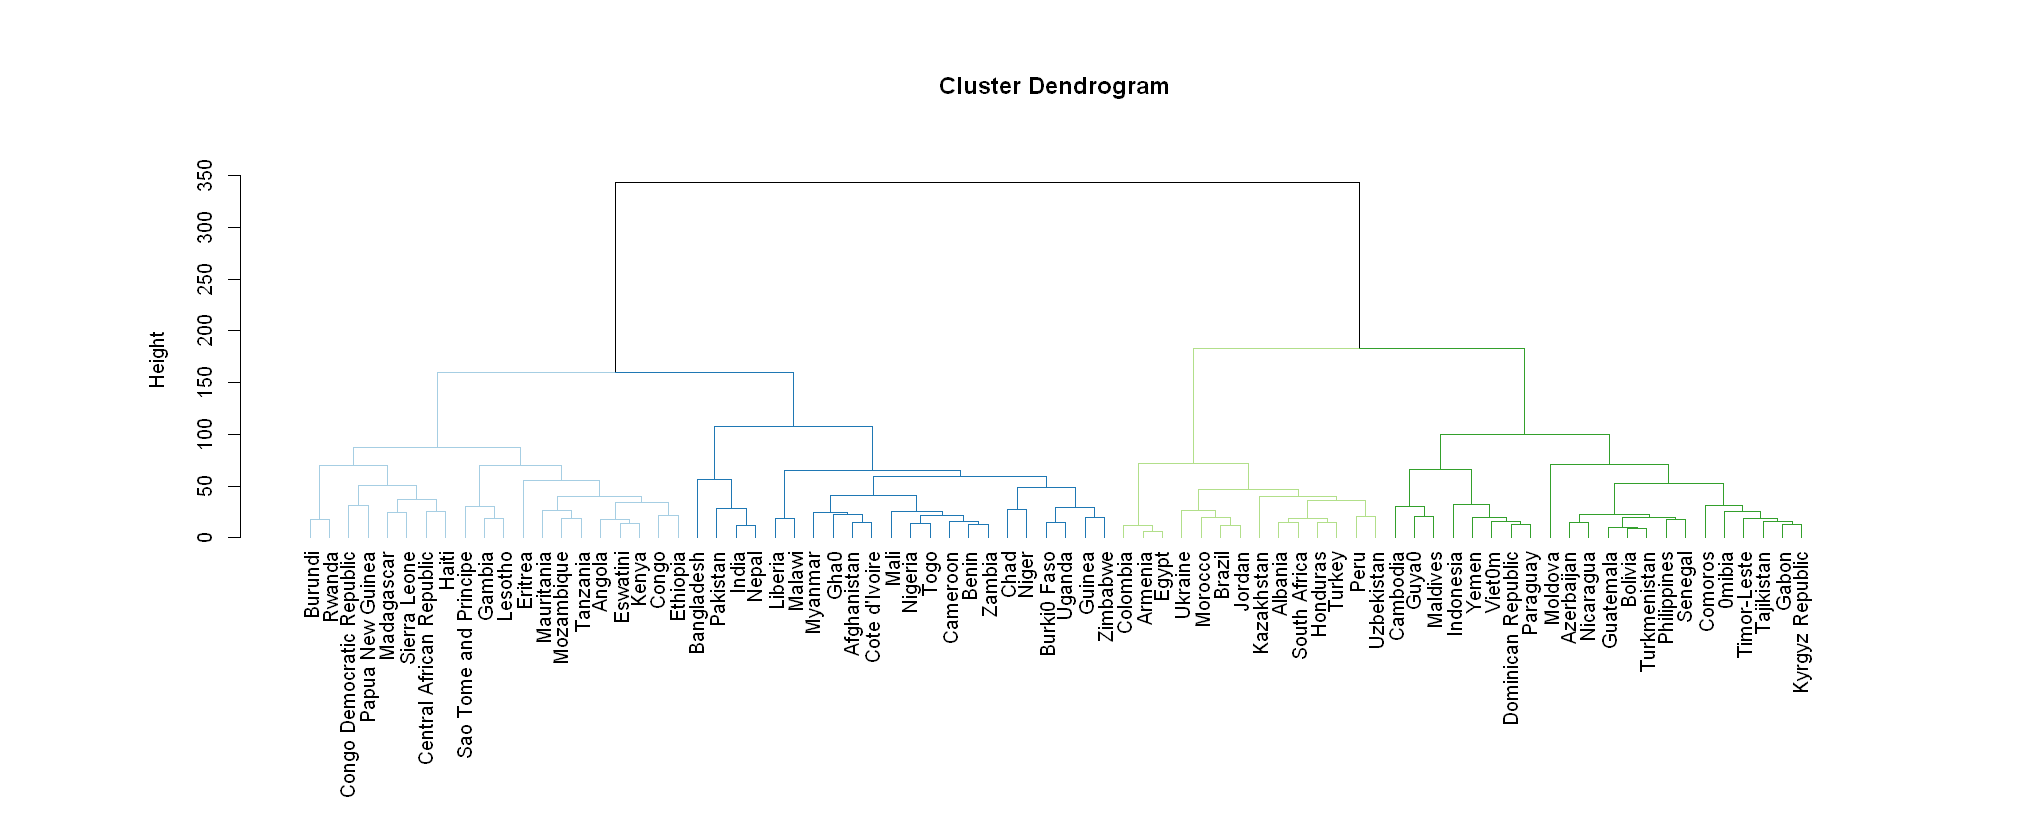

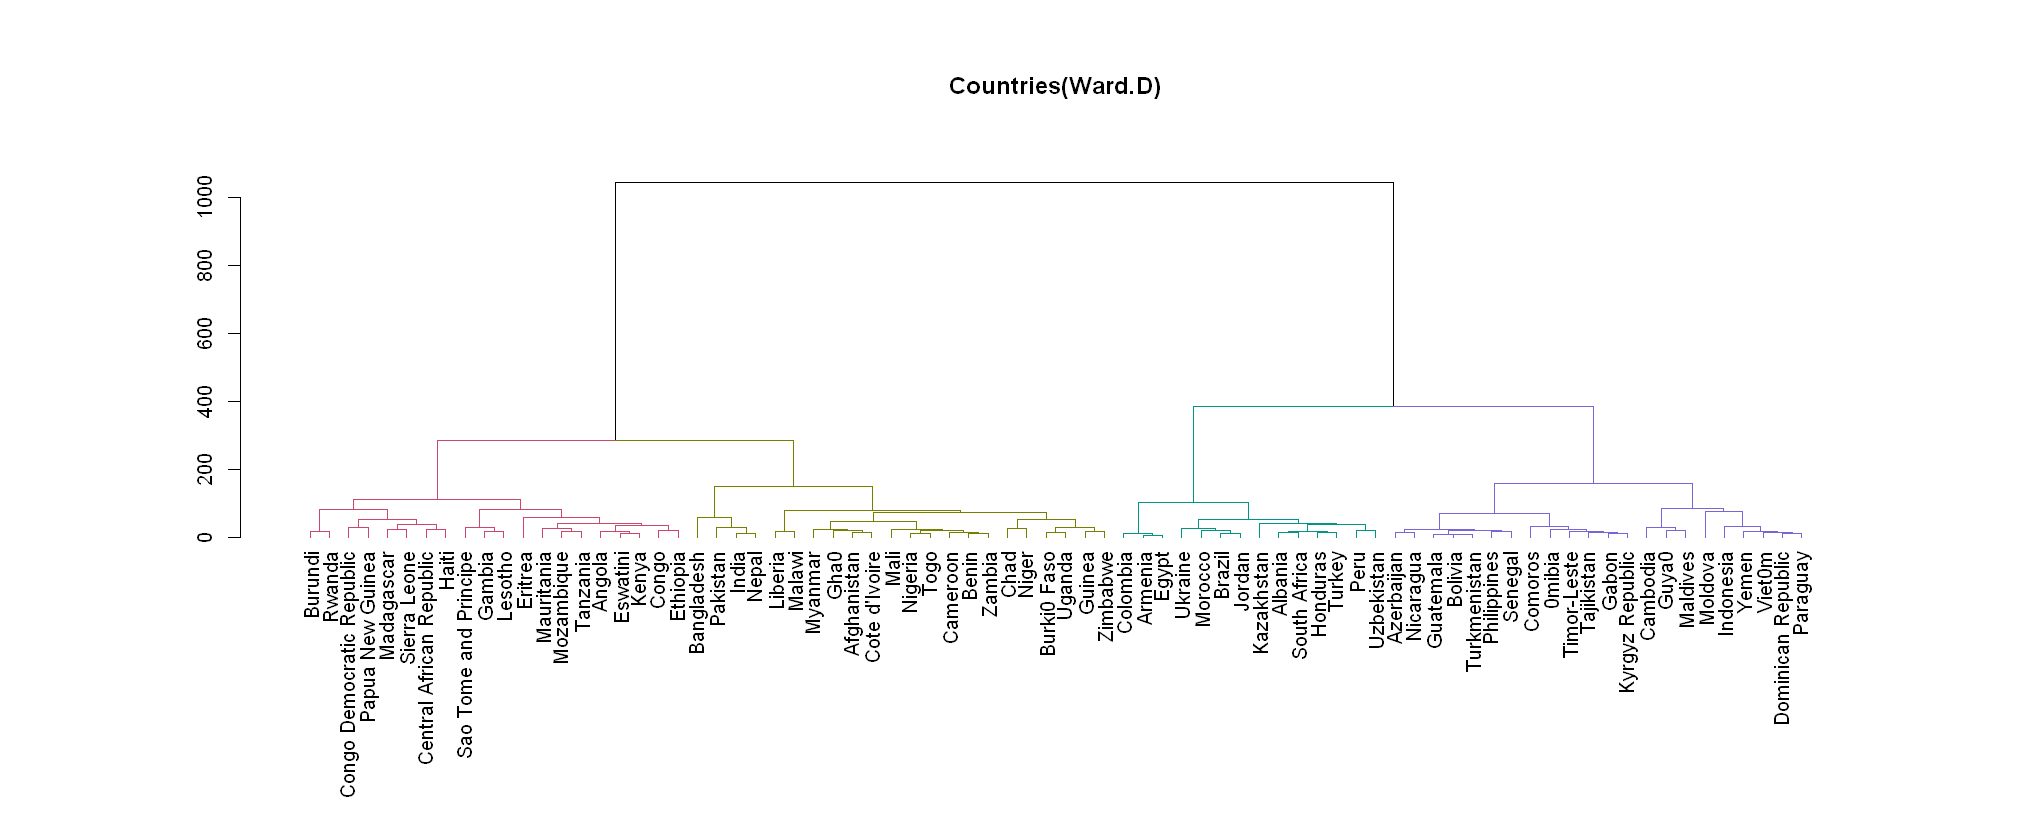

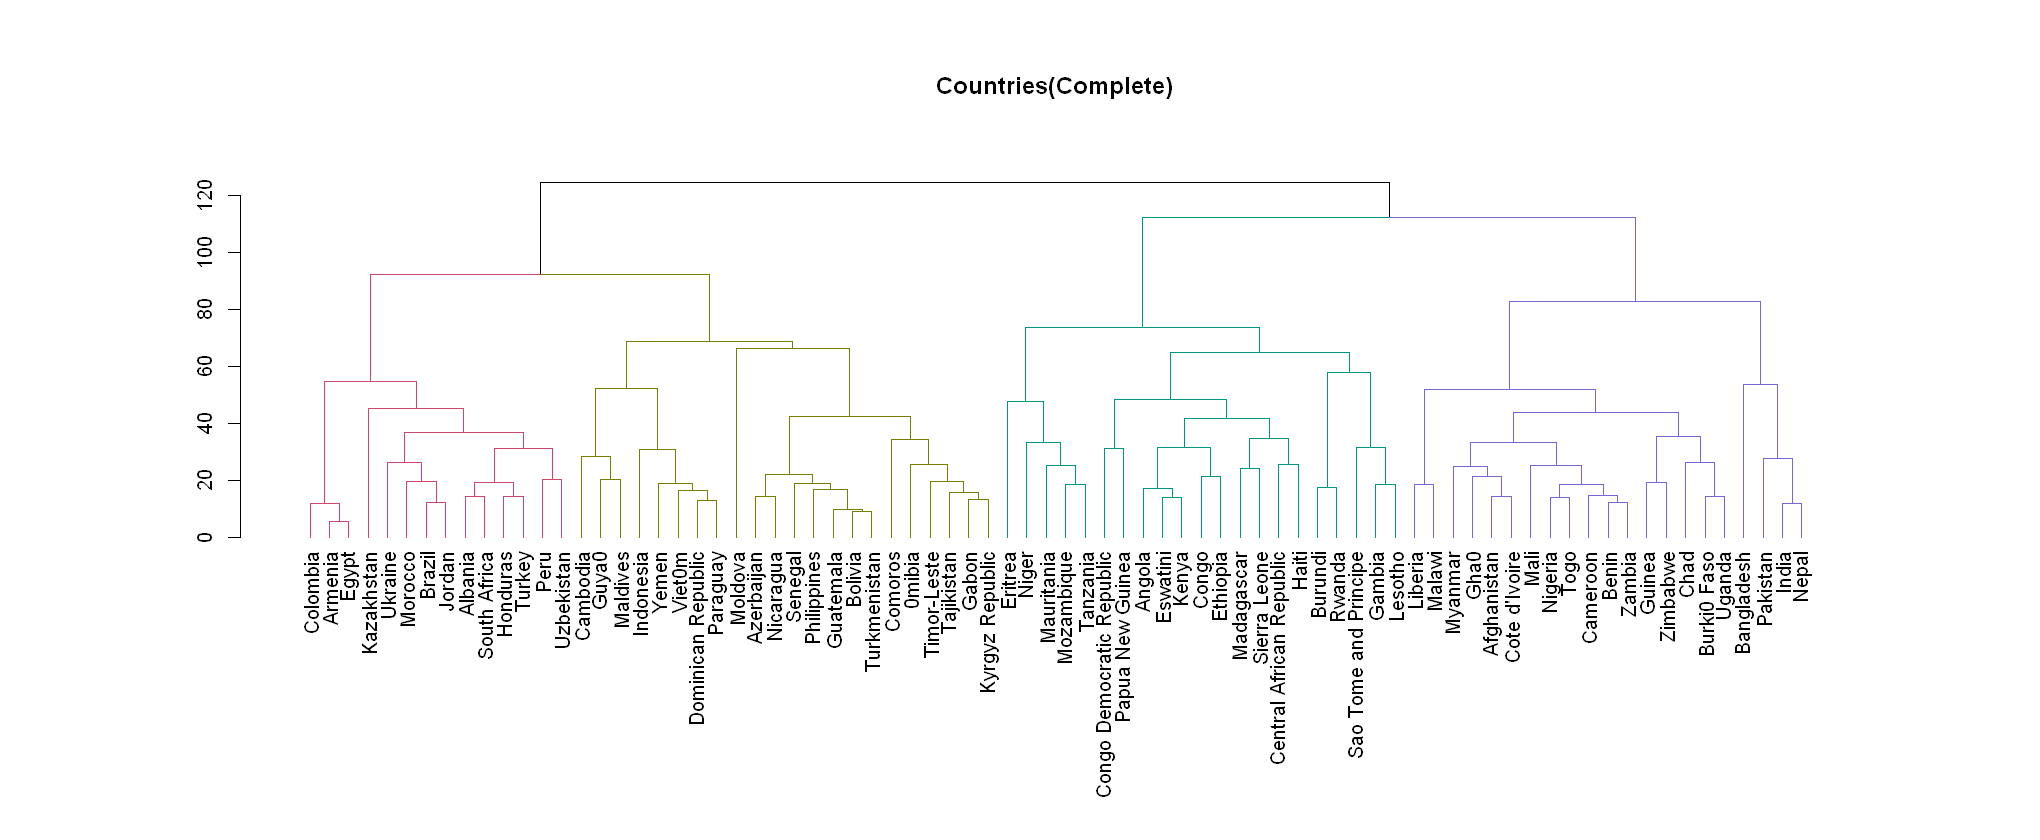

In [13]:
dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=4, col = c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c"))
labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
par(mar = c(12,10,7,7))
par(cex=1)
plot(dend, main="Cluster Dendrogram", xlab="", 
     ylab="Height",horiz=FALSE )


df.wa.d2.avg <- mutate(df.wa, cluster = clusters_wa)
count(df.wa.d2.avg, cluster)

sapply(unique(clusters_wa),function(g)dfsimple$Country[clusters_wa == g])

dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=4)
labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Ward.D)", xlab="", 
     ylab="", cex=.5,  )

dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=4)
labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Complete)", xlab="", 
     ylab="", cex=.5,  )
   


# K-Mean Clustering in R

In [14]:
# distance <- get_dist(df.wa)
labels(distance) <- dfsimple$Country
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high="#FC4E07"), lab_size = 7 )
k2 <- kmeans(df.wa, centers = 2, nstart = 25)
str(k2)
k2
fviz_cluster(k2, data = df.wa ,  )
# it is often advantageous to use several different values of k and examine the differences in the results.
# We can execute the same process for 3, 4, and 5 clusters, and the results are shown in the figure:
k3 <- kmeans(df.wa, centers = 3, nstart = 25)
k4 <- kmeans(df.wa, centers = 4, nstart = 25)
k5 <- kmeans(df.wa, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df.wa) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df.wa) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df.wa) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df.wa) + ggtitle("k = 5")
grid.arrange(p1, p2, p3, p4, nrow = 2)
str(k4)
k4
fviz_cluster(k4, data = df.wa ,  )

ERROR: Error in labels(distance) <- dfsimple$Country: object 'distance' not found


# Gap Stat Method

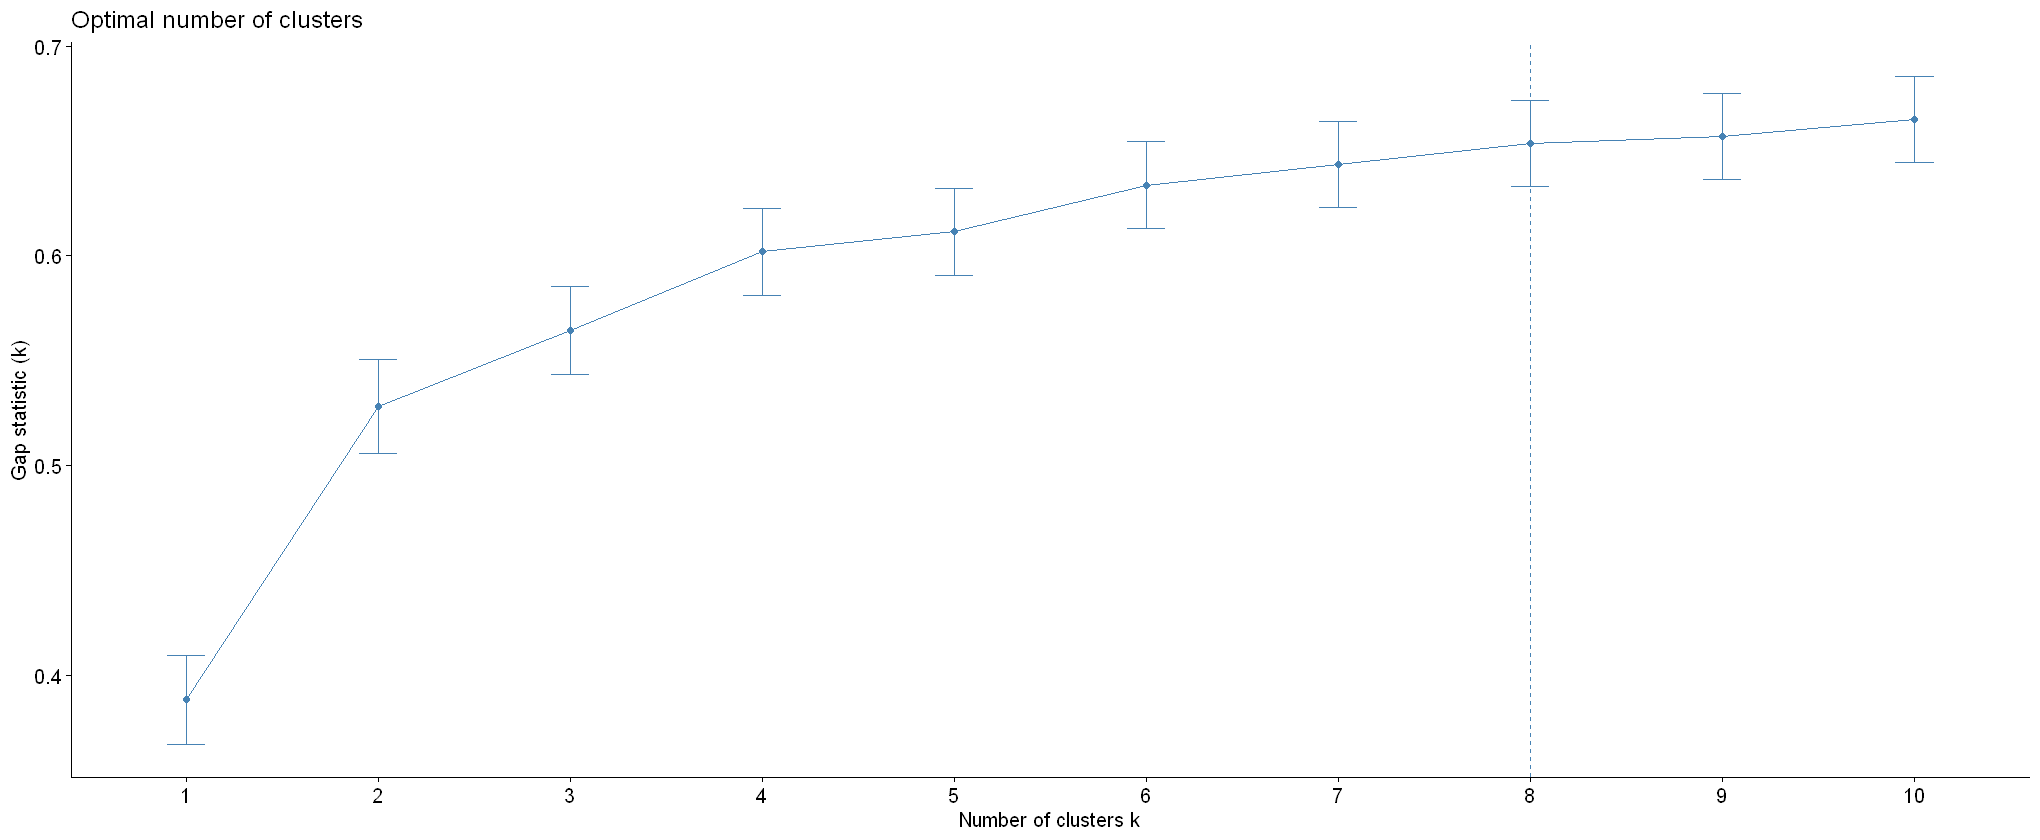

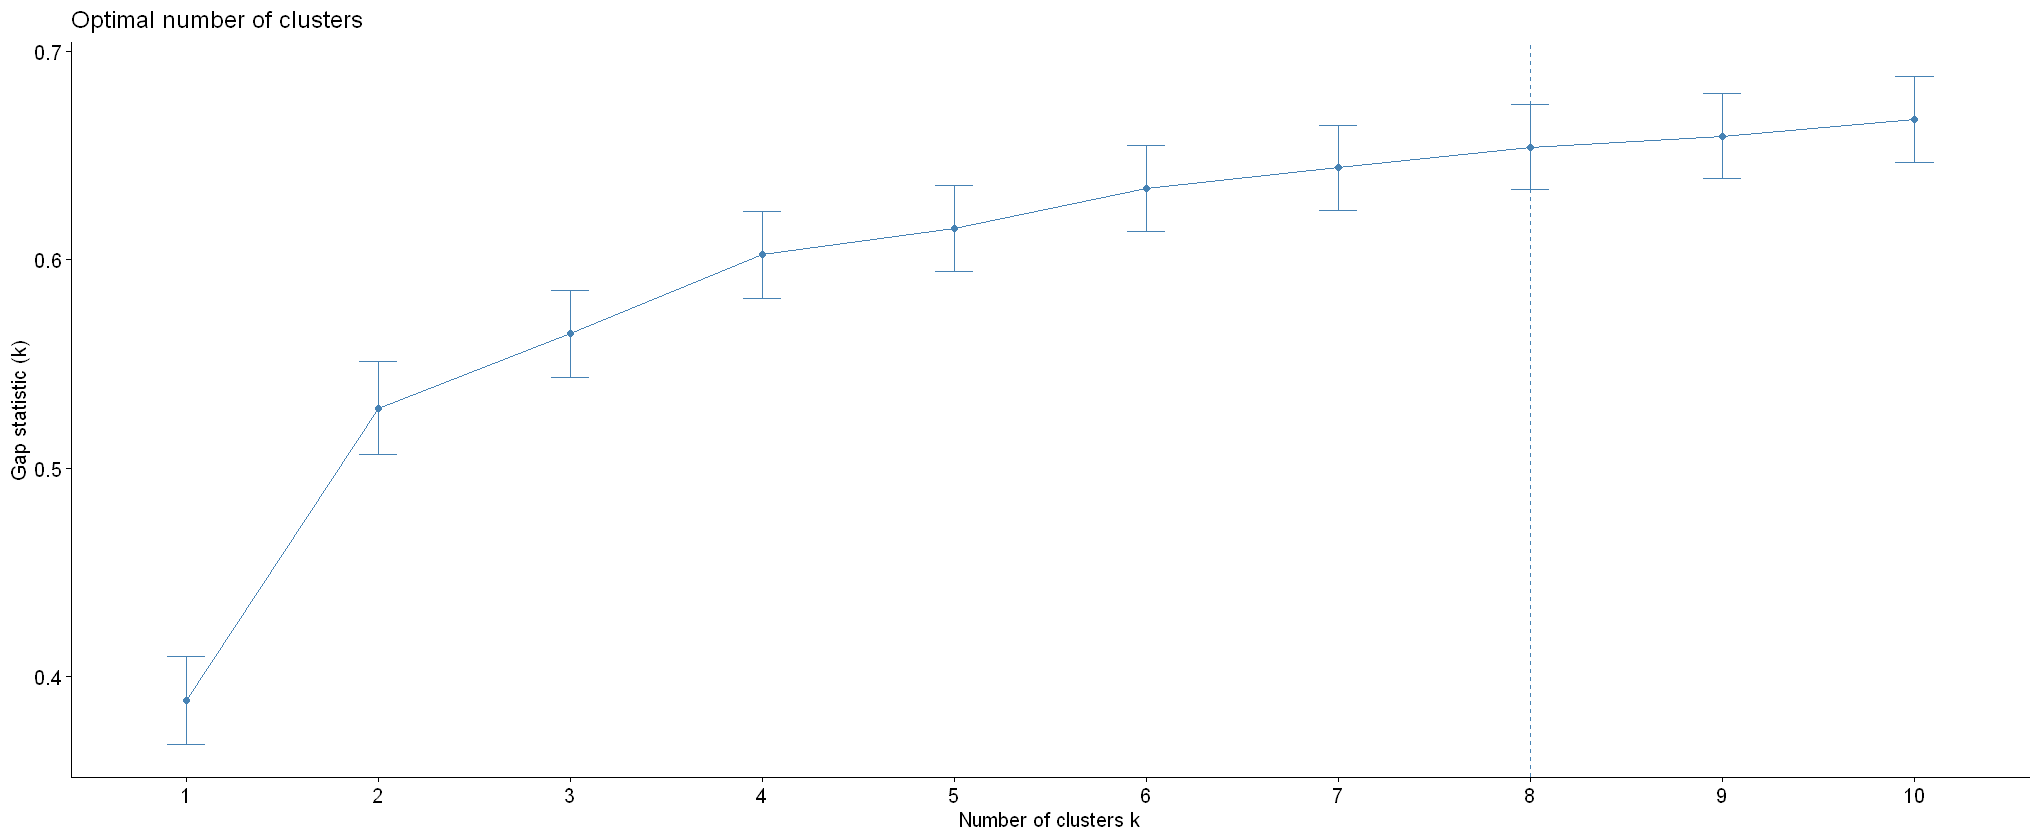

ERROR: Error in eval(expr, envir, enclos): object 'df1' not found


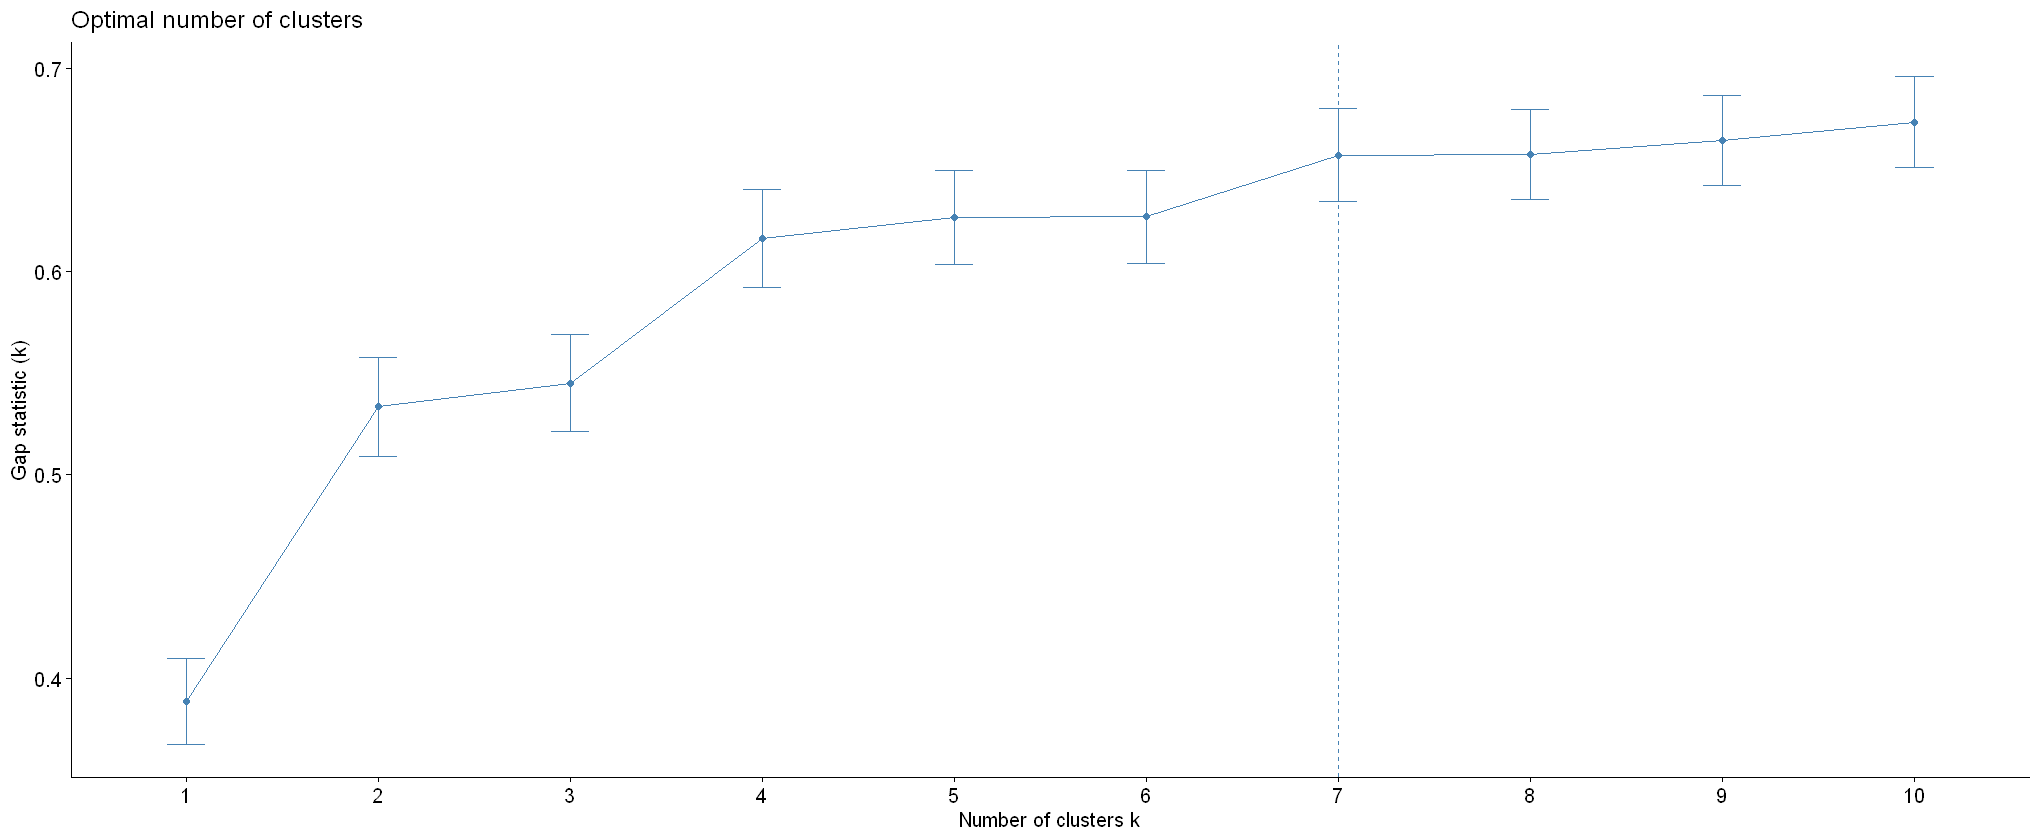

In [39]:
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D2" ,
                    K.max = 10, B = 1000,  method = c('Tibs2001SEmax'))
fviz_gap_stat(gap_stat)


set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D" ,
                    K.max = 10, B = 1000, method ='Tibs2001SEmax')
fviz_gap_stat(gap_stat)
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="complete" ,
                    K.max = 10, B = 1000)
fviz_gap_stat(gap_stat)
### Fancy Clustering Graph for WARD D2 Gap ### 
dend <- as.dendrogram(hc.ward2)
dend <- color_branches(dend, k=8)

labels(dend) <- df1$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Ward Gap ###
dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=8)

labels(dend) <- df1$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Complete Gap ###
dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=7)

labels(dend) <- df1$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )